In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from typing import List
import os


In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)


TensorBoard version:  2.5.0a20210317


In [3]:
training_id = "GdT3NWjeQ6u7fBj5McxeTQ"
training_experiment = tb.data.experimental.ExperimentFromDev(training_id)
training_df = training_experiment.get_scalars()

In [4]:
#from: https://stackoverflow.com/questions/42281844/what-is-the-mathematics-behind-the-smoothing-parameter-in-tensorboards-scalar
# Weighted average for plotting
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [59]:
#Generate a plot for an individual metric
def generate_metric_plot(dataframe, metric_name, title, figure_path, smoothing):
    metric_frame = dataframe.loc[dataframe['tag'] == metric_name]
    metric_frame = metric_frame.reset_index()
    steps = metric_frame['step']
    values = metric_frame['value']
    plt.plot(steps, values, label=metric_name)
    if smoothing != 0:
        smoothed = smooth(values, smoothing)
        plt.plot(steps, smoothed, label='Smoothed ' + str(smoothing))
    plt.legend()
    plt.title(title)
    plt.xlabel('Steps')
    plt.ylabel(metric_name)
    if metric_name == 'avg val accuracy':
        plt.ylim(0.25, 0.4)
    save_path = os.path.join(figure_path, metric_name)
    plt.savefig(save_path)
    plt.show()

    


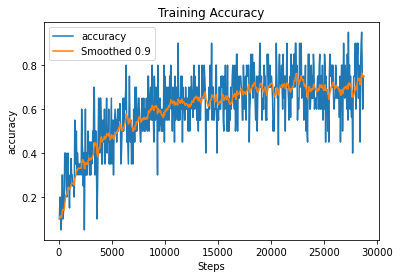

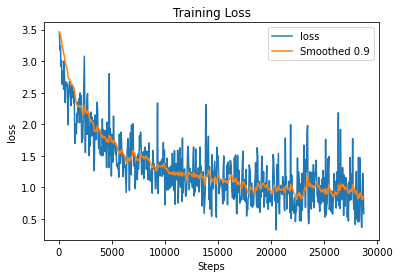

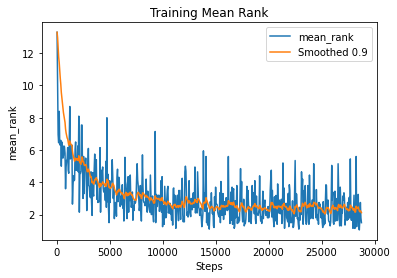

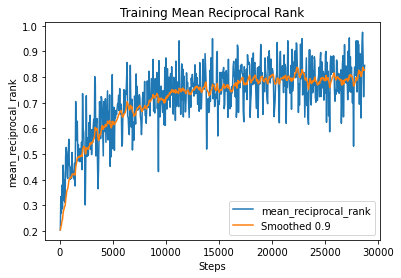

In [60]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/baseline_and_blindfolding/training'

generate_metric_plot(training_df, 'accuracy', 'Training Accuracy', figure_path, 0.9)
generate_metric_plot(training_df, 'loss', 'Training Loss', figure_path, 0.9)
generate_metric_plot(training_df, 'mean_rank', 'Training Mean Rank', figure_path, 0.9)
generate_metric_plot(training_df, 'mean_reciprocal_rank', 'Training Mean Reciprocal Rank', figure_path, 0.9)

In [7]:
images_id = "9f80B9nWR5y7nWmZV7nrfg"
images_experiment = tb.data.experimental.ExperimentFromDev(images_id)
images_df = images_experiment.get_scalars()

In [8]:
images_df

,run,tag,step,value
0,vqa/tb,avg val accuracy,0,0.242857
1,vqa/tb,avg val accuracy,1,0.298469
2,vqa/tb,avg val accuracy,2,0.303061
3,vqa/tb,avg val accuracy,3,0.304082
4,vqa/tb,avg val accuracy,4,0.331122
...,...,...,...,...
195,vqa/tb,avg val mean reciprocal rank,45,0.522261
196,vqa/tb,avg val mean reciprocal rank,46,0.531473
197,vqa/tb,avg val mean reciprocal rank,47,0.520929
198,vqa/tb,avg val mean reciprocal rank,48,0.499865


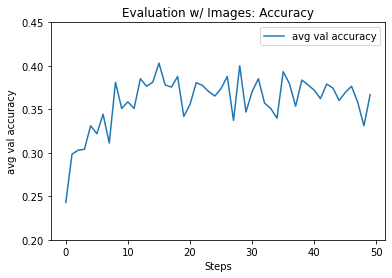

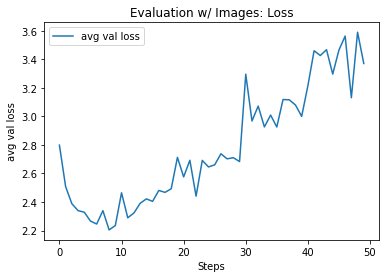

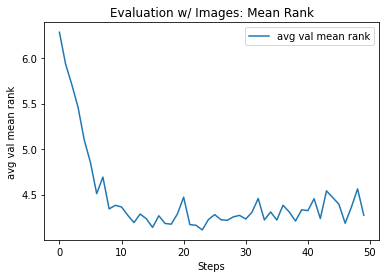

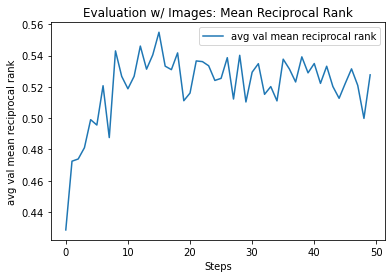

In [9]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/baseline_and_blindfolding/images'

generate_metric_plot(images_df, 'avg val accuracy', 'Evaluation w/ Images: Accuracy', figure_path, 0)
generate_metric_plot(images_df, 'avg val loss', 'Evaluation w/ Images: Loss', figure_path, 0)
generate_metric_plot(images_df, 'avg val mean rank', 'Evaluation w/ Images: Mean Rank', figure_path, 0)
generate_metric_plot(images_df, 'avg val mean reciprocal rank', 'Evaluation w/ Images: Mean Reciprocal Rank', figure_path, 0)

In [10]:
blindfolded_id = "zxt0S14pTpyed4TpSR9Rcw"
blindfolded_experiment = tb.data.experimental.ExperimentFromDev(blindfolded_id)
blindfolded_df = blindfolded_experiment.get_scalars()

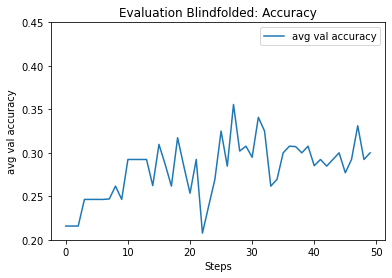

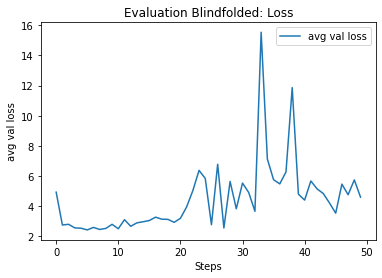

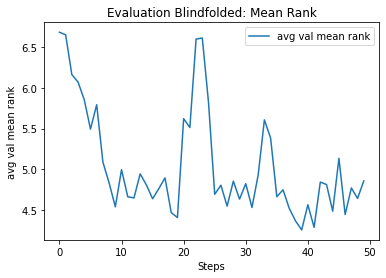

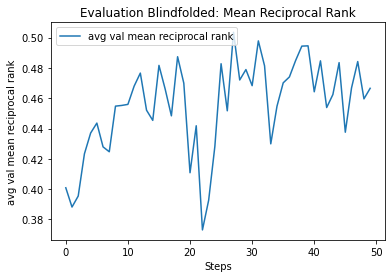

In [11]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/baseline_and_blindfolding/blindfolded'

generate_metric_plot(blindfolded_df, 'avg val accuracy', 'Evaluation Blindfolded: Accuracy', figure_path, 0)
generate_metric_plot(blindfolded_df, 'avg val loss', 'Evaluation Blindfolded: Loss', figure_path,  0)
generate_metric_plot(blindfolded_df, 'avg val mean rank', 'Evaluation Blindfolded: Mean Rank', figure_path, 0)
generate_metric_plot(blindfolded_df, 'avg val mean reciprocal rank', 'Evaluation Blindfolded: Mean Reciprocal Rank', figure_path, 0)

In [12]:
# gets information for first maximum value
def get_maximum_row(dataframe, metric_name):
    metric_frame = dataframe.loc[dataframe['tag'] == metric_name]
    ckpt = metric_frame[metric_frame['value']== metric_frame['value'].max()]['step'].values[0]
    return dataframe.loc[dataframe['step'] == ckpt]
    
    
# gets information for first minimum value
def get_minimum_row(dataframe, metric_name):
    metric_frame = dataframe.loc[dataframe['tag'] == metric_name]
    ckpt = metric_frame[metric_frame['value']== metric_frame['value'].min()]['step'].values[0]
    return dataframe.loc[dataframe['step'] == ckpt]


In [13]:
get_maximum_row(images_df, 'avg val accuracy')

,run,tag,step,value
15,vqa/tb,avg val accuracy,15,0.403061
65,vqa/tb,avg val loss,15,2.404433
115,vqa/tb,avg val mean rank,15,4.138265
165,vqa/tb,avg val mean reciprocal rank,15,0.554850


In [14]:
get_maximum_row(blindfolded_df, 'avg val accuracy')

,run,tag,step,value
27,tb,avg val accuracy,27,0.355612
77,tb,avg val loss,27,2.546098
127,tb,avg val mean rank,27,4.551021
177,tb,avg val mean reciprocal rank,27,0.503566


In [15]:
get_minimum_row(images_df, 'avg val mean rank')

,run,tag,step,value
23,vqa/tb,avg val accuracy,23,0.370408
73,vqa/tb,avg val loss,23,2.691763
123,vqa/tb,avg val mean rank,23,4.110714
173,vqa/tb,avg val mean reciprocal rank,23,0.533446


In [16]:
get_minimum_row(blindfolded_df, 'avg val mean rank')

,run,tag,step,value
39,tb,avg val accuracy,39,0.307653
89,tb,avg val loss,39,4.788071
139,tb,avg val mean rank,39,4.260204
189,tb,avg val mean reciprocal rank,39,0.494594


In [17]:
get_minimum_row(images_df, 'avg val loss')

,run,tag,step,value
8,vqa/tb,avg val accuracy,8,0.381122
58,vqa/tb,avg val loss,8,2.204141
108,vqa/tb,avg val mean rank,8,4.341837
158,vqa/tb,avg val mean reciprocal rank,8,0.542944


In [18]:
get_minimum_row(blindfolded_df, 'avg val loss')

,run,tag,step,value
5,tb,avg val accuracy,5,0.246429
55,tb,avg val loss,5,2.416477
105,tb,avg val mean rank,5,5.493877
155,tb,avg val mean reciprocal rank,5,0.443596


## Semantic Categories

In [19]:
category_training_id = "r96uoyBYTxKm1Buo6N0drg"
category_training_experiment = tb.data.experimental.ExperimentFromDev(category_training_id)
category_training_df = category_training_experiment.get_scalars()

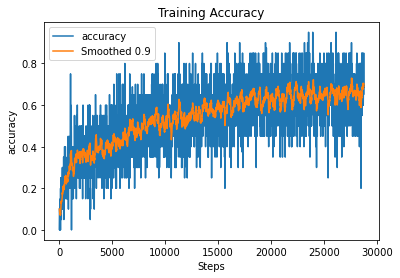

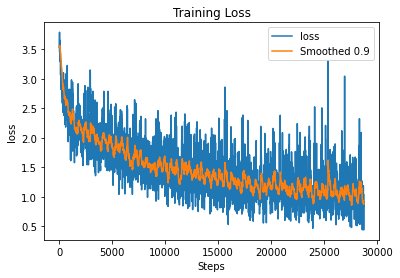

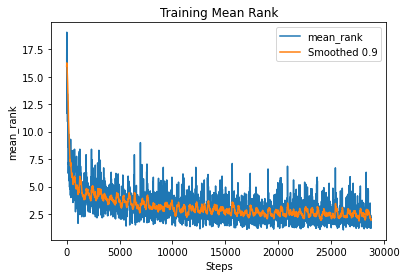

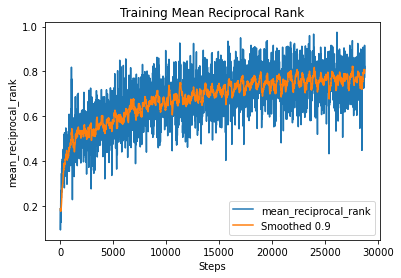

In [20]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/semantic_categories/training'

generate_metric_plot(category_training_df, 'accuracy', 'Training Accuracy', figure_path, 0.9)
generate_metric_plot(category_training_df, 'loss', 'Training Loss', figure_path, 0.9)
generate_metric_plot(category_training_df, 'mean_rank', 'Training Mean Rank', figure_path, 0.9)
generate_metric_plot(category_training_df, 'mean_reciprocal_rank', 'Training Mean Reciprocal Rank', figure_path, 0.9)

In [21]:
category_id = "6fkTYxZKTDqODVYTNMzOBw"
category_experiment = tb.data.experimental.ExperimentFromDev(category_id)
category_df = category_experiment.get_scalars()

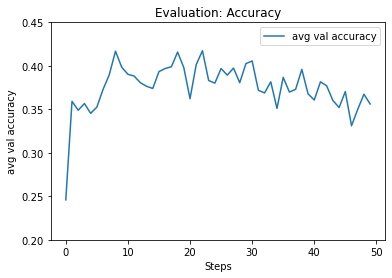

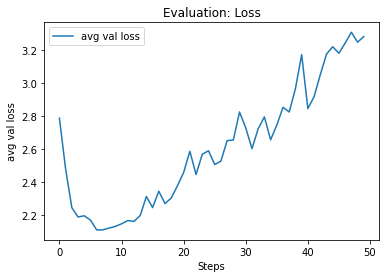

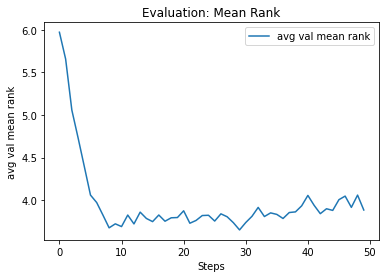

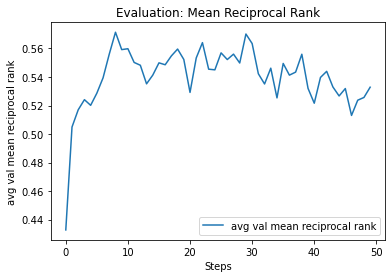

In [22]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/semantic_categories/eval'

generate_metric_plot(category_df, 'avg val accuracy', 'Evaluation: Accuracy', figure_path, 0)
generate_metric_plot(category_df, 'avg val loss', 'Evaluation: Loss', figure_path,  0)
generate_metric_plot(category_df, 'avg val mean rank', 'Evaluation: Mean Rank', figure_path, 0)
generate_metric_plot(category_df, 'avg val mean reciprocal rank', 'Evaluation: Mean Reciprocal Rank', figure_path, 0)

In [23]:
get_maximum_row(category_df, 'avg val accuracy')

,run,tag,step,value
22,.,avg val accuracy,22,0.417347
72,.,avg val loss,22,2.444937
122,.,avg val mean rank,22,3.761735
172,.,avg val mean reciprocal rank,22,0.564087


In [24]:
get_minimum_row(category_df, 'avg val loss')

,run,tag,step,value
6,.,avg val accuracy,6,0.372959
56,.,avg val loss,6,2.108628
106,.,avg val mean rank,6,3.971939
156,.,avg val mean reciprocal rank,6,0.539406


In [25]:
get_minimum_row(category_df, 'avg val mean rank')

,run,tag,step,value
29,.,avg val accuracy,29,0.402551
79,.,avg val loss,29,2.824962
129,.,avg val mean rank,29,3.650510
179,.,avg val mean reciprocal rank,29,0.570134


## Look Around

In [26]:
la_training_id = "EOUn6zSEQZK4LxEYhGEYUQ"
la_training_experiment = tb.data.experimental.ExperimentFromDev(la_training_id)
la_training_df = la_training_experiment.get_scalars()

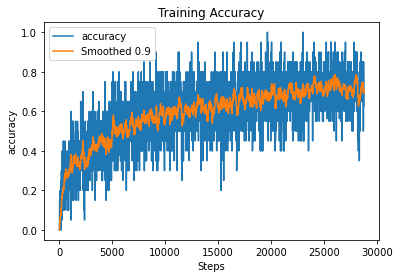

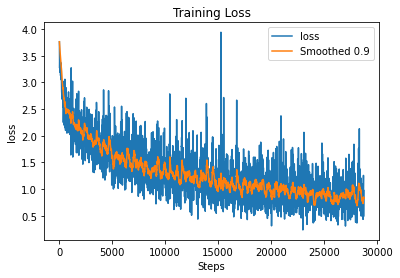

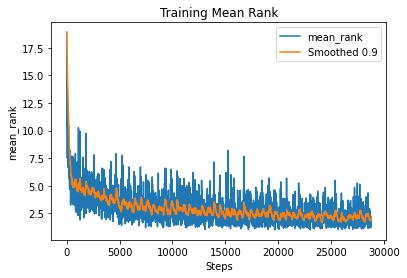

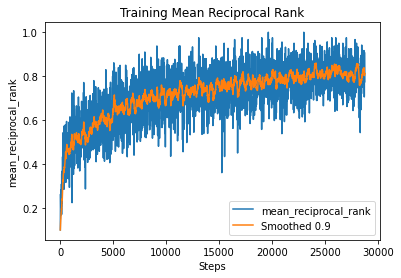

In [27]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/look_around/training'
generate_metric_plot(la_training_df, 'accuracy', 'Training Accuracy', figure_path, 0.9)
generate_metric_plot(la_training_df, 'loss', 'Training Loss', figure_path, 0.9)
generate_metric_plot(la_training_df, 'mean_rank', 'Training Mean Rank', figure_path, 0.9)
generate_metric_plot(la_training_df, 'mean_reciprocal_rank', 'Training Mean Reciprocal Rank', figure_path, 0.9)

In [28]:
la_id = "73aVRghpR7e4uDlPP7ynDA"
la_experiment = tb.data.experimental.ExperimentFromDev(la_id)
la_df = la_experiment.get_scalars()

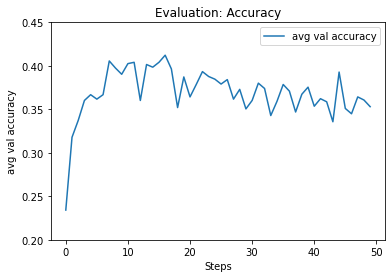

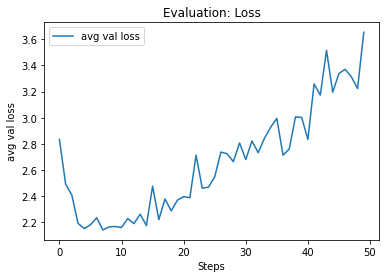

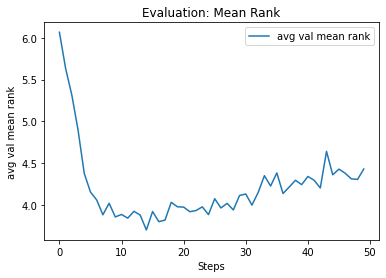

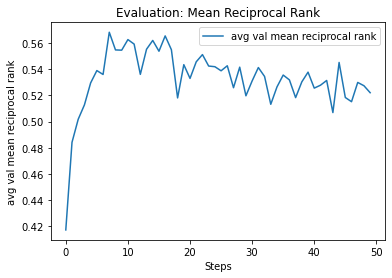

In [29]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/look_around/eval'

generate_metric_plot(la_df, 'avg val accuracy', 'Evaluation: Accuracy', figure_path, 0)
generate_metric_plot(la_df, 'avg val loss', 'Evaluation: Loss', figure_path,  0)
generate_metric_plot(la_df, 'avg val mean rank', 'Evaluation: Mean Rank', figure_path, 0)
generate_metric_plot(la_df, 'avg val mean reciprocal rank', 'Evaluation: Mean Reciprocal Rank', figure_path, 0)

In [30]:
get_maximum_row(la_df, 'avg val accuracy')

,run,tag,step,value
16,.,avg val accuracy,16,0.412245
66,.,avg val loss,16,2.219612
116,.,avg val mean rank,16,3.798980
166,.,avg val mean reciprocal rank,16,0.565559


In [31]:
get_minimum_row(la_df, 'avg val mean rank')

,run,tag,step,value
14,.,avg val accuracy,14,0.398469
64,.,avg val loss,14,2.173734
114,.,avg val mean rank,14,3.700000
164,.,avg val mean reciprocal rank,14,0.562091


In [32]:
get_minimum_row(la_df, 'avg val loss')

,run,tag,step,value
7,.,avg val accuracy,7,0.405612
57,.,avg val loss,7,2.140735
107,.,avg val mean rank,7,3.881122
157,.,avg val mean reciprocal rank,7,0.568360


## Fully Blindfolded

In [33]:
fb_training_id = "C2Uv7lreRmqq9L1sgXiMGg"
fb_training_experiment = tb.data.experimental.ExperimentFromDev(fb_training_id)
fb_training_df = fb_training_experiment.get_scalars()

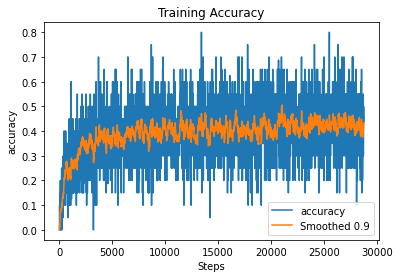

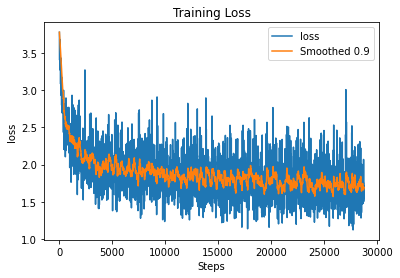

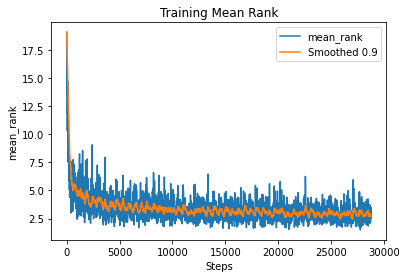

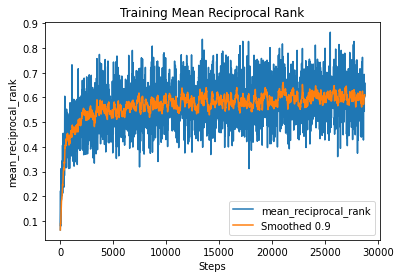

In [34]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/fully_blinded/training'
generate_metric_plot(fb_training_df, 'accuracy', 'Training Accuracy', figure_path, 0.9)
generate_metric_plot(fb_training_df, 'loss', 'Training Loss', figure_path, 0.9)
generate_metric_plot(fb_training_df, 'mean_rank', 'Training Mean Rank', figure_path, 0.9)
generate_metric_plot(fb_training_df, 'mean_reciprocal_rank', 'Training Mean Reciprocal Rank', figure_path, 0.9)

In [35]:
fb_id = "bCk0ND2SRYSj9P1TDsjZxg"
fb_experiment = tb.data.experimental.ExperimentFromDev(fb_id)
fb_df = fb_experiment.get_scalars()

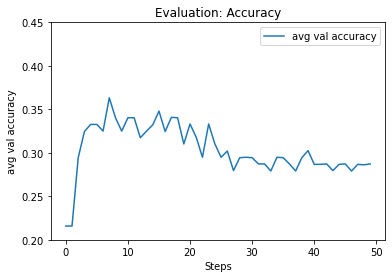

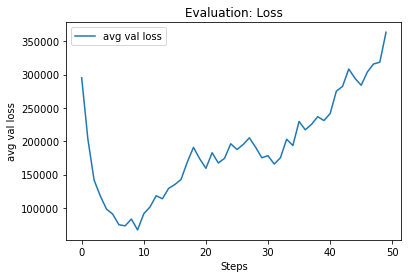

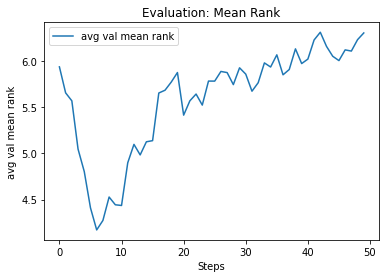

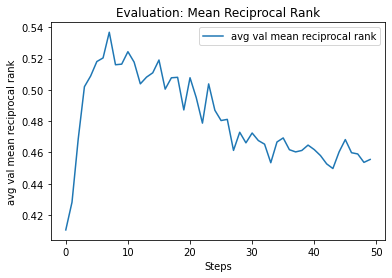

In [36]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/fully_blinded/eval'

generate_metric_plot(fb_df, 'avg val accuracy', 'Evaluation: Accuracy', figure_path, 0)
generate_metric_plot(fb_df, 'avg val loss', 'Evaluation: Loss', figure_path,  0)
generate_metric_plot(fb_df, 'avg val mean rank', 'Evaluation: Mean Rank', figure_path, 0)
generate_metric_plot(fb_df, 'avg val mean reciprocal rank', 'Evaluation: Mean Reciprocal Rank', figure_path, 0)

In [37]:
get_maximum_row(fb_df, 'avg val accuracy')

,run,tag,step,value
7,.,avg val accuracy,7,0.363265
57,.,avg val loss,7,73306.476562
107,.,avg val mean rank,7,4.273469
157,.,avg val mean reciprocal rank,7,0.536856


In [38]:
get_minimum_row(fb_df, 'avg val mean rank')

,run,tag,step,value
6,.,avg val accuracy,6,0.325000
56,.,avg val loss,6,74890.796875
106,.,avg val mean rank,6,4.171429
156,.,avg val mean reciprocal rank,6,0.520427


In [39]:
boosted_id = "005REN1rROG47OXpPlrKYQ"
boosted_experiment = tb.data.experimental.ExperimentFromDev(boosted_id)
boosted_df = boosted_experiment.get_scalars()

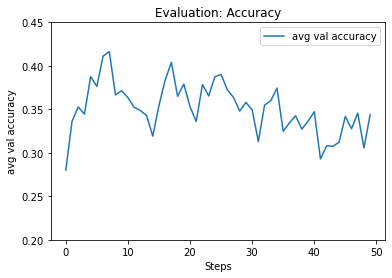

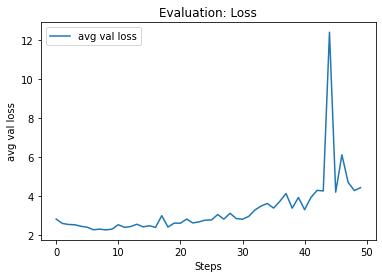

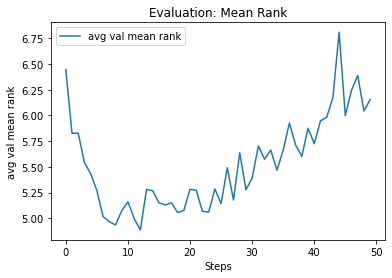

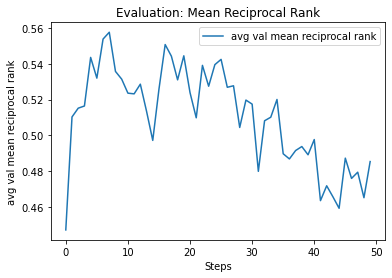

In [40]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/boosted/eval'

generate_metric_plot(boosted_df, 'avg val accuracy', 'Evaluation: Accuracy', figure_path, 0)
generate_metric_plot(boosted_df, 'avg val loss', 'Evaluation: Loss', figure_path,  0)
generate_metric_plot(boosted_df, 'avg val mean rank', 'Evaluation: Mean Rank', figure_path, 0)
generate_metric_plot(boosted_df, 'avg val mean reciprocal rank', 'Evaluation: Mean Reciprocal Rank', figure_path, 0)

In [41]:
get_maximum_row(boosted_df, 'avg val accuracy')

,run,tag,step,value
7,.,avg val accuracy,7,0.416396
57,.,avg val loss,7,2.303375
107,.,avg val mean rank,7,4.967247
157,.,avg val mean reciprocal rank,7,0.557712


In [42]:
get_minimum_row(boosted_df, 'avg val mean rank')

,run,tag,step,value
12,.,avg val accuracy,12,0.348640
62,.,avg val loss,12,2.434768
112,.,avg val mean rank,12,4.886560
162,.,avg val mean reciprocal rank,12,0.528644


## FRCNN FEATS V1

In [43]:
frcnn_training_id = "7l3lq8ROTbCGmhJTZmWw7Q"
frcnn_training_experiment = tb.data.experimental.ExperimentFromDev(frcnn_training_id)
frcnn_training_df = frcnn_training_experiment.get_scalars()

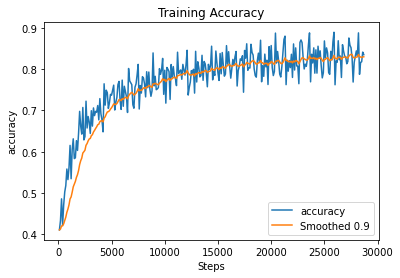

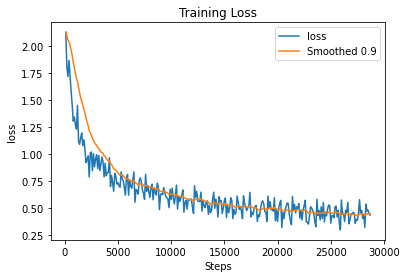

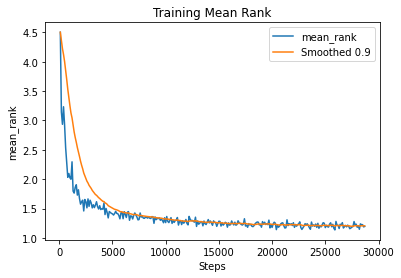

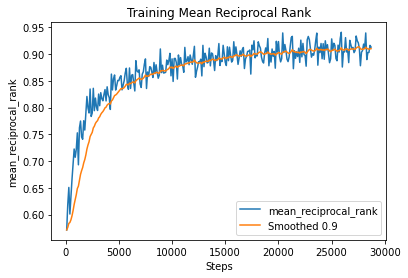

In [44]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/frcnn_feats_v1/training'

generate_metric_plot(frcnn_training_df, 'accuracy', 'Training Accuracy', figure_path, 0.9)
generate_metric_plot(frcnn_training_df, 'loss', 'Training Loss', figure_path, 0.9)
generate_metric_plot(frcnn_training_df, 'mean_rank', 'Training Mean Rank', figure_path, 0.9)
generate_metric_plot(frcnn_training_df, 'mean_reciprocal_rank', 'Training Mean Reciprocal Rank', figure_path, 0.9)

In [45]:
frcnn_v1_id = "FV8f2JC2RaaJsZWOCb1aRQ"
frcnn_v1_experiment = tb.data.experimental.ExperimentFromDev(frcnn_v1_id)
frcnn_v1_df = frcnn_v1_experiment.get_scalars()

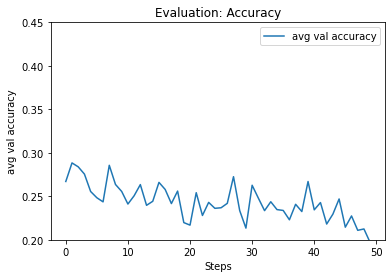

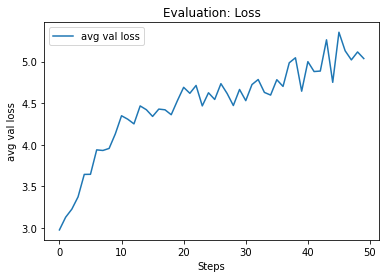

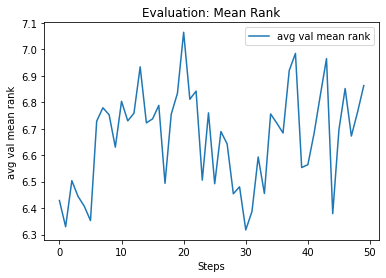

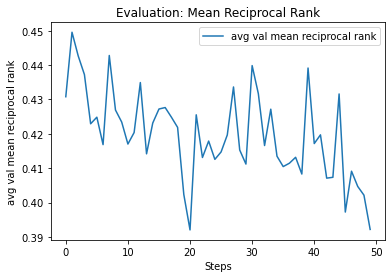

In [46]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/frcnn_feats_v1/eval'
generate_metric_plot(frcnn_v1_df, 'avg val accuracy', 'Evaluation: Accuracy', figure_path, 0)
generate_metric_plot(frcnn_v1_df, 'avg val loss', 'Evaluation: Loss', figure_path,  0)
generate_metric_plot(frcnn_v1_df, 'avg val mean rank', 'Evaluation: Mean Rank', figure_path, 0)
generate_metric_plot(frcnn_v1_df, 'avg val mean reciprocal rank', 'Evaluation: Mean Reciprocal Rank', figure_path, 0)

## FRCNN Feats V2

In [47]:
frcnn_v2_training_id = "dLI8OLcQS0WUDEvyaPuydQ"
frcnn_v2_training_experiment = tb.data.experimental.ExperimentFromDev(frcnn_v2_training_id)
frcnn_v2_training_df = frcnn_v2_training_experiment.get_scalars()

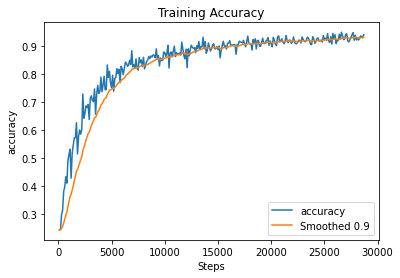

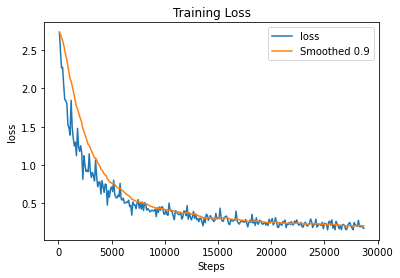

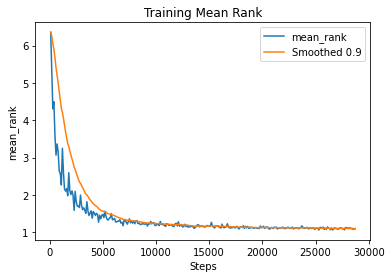

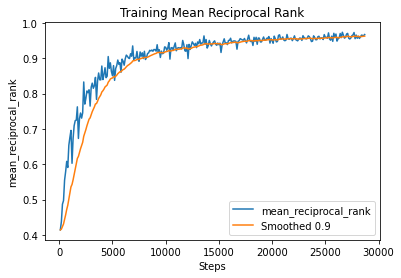

In [48]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/frcnn_feats_v2/training'

generate_metric_plot(frcnn_v2_training_df, 'accuracy', 'Training Accuracy', figure_path, 0.9)
generate_metric_plot(frcnn_v2_training_df, 'loss', 'Training Loss', figure_path, 0.9)
generate_metric_plot(frcnn_v2_training_df, 'mean_rank', 'Training Mean Rank', figure_path, 0.9)
generate_metric_plot(frcnn_v2_training_df, 'mean_reciprocal_rank', 'Training Mean Reciprocal Rank', figure_path, 0.9)

In [49]:
frcnn_v2_id = "v4EPlQoVRSyXAgqT1mGjzw"
frcnn_v2_experiment = tb.data.experimental.ExperimentFromDev(frcnn_v2_id)
frcnn_v2_df = frcnn_v2_experiment.get_scalars()

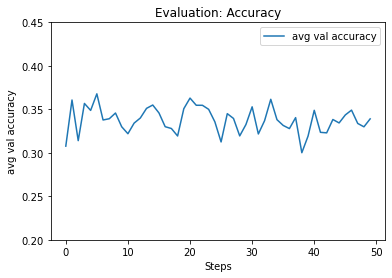

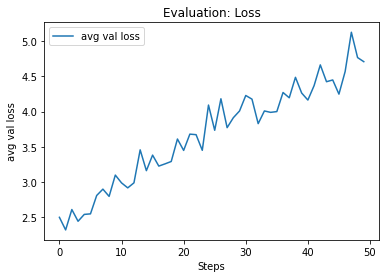

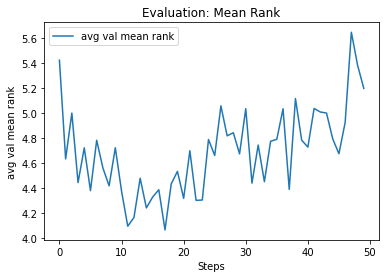

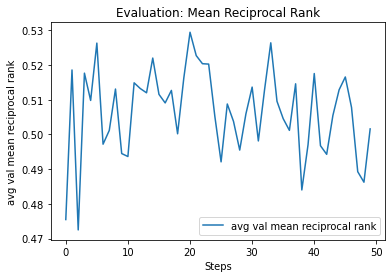

In [50]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/frcnn_feats_v2/eval'
generate_metric_plot(frcnn_v2_df, 'avg val accuracy', 'Evaluation: Accuracy', figure_path, 0)
generate_metric_plot(frcnn_v2_df, 'avg val loss', 'Evaluation: Loss', figure_path,  0)
generate_metric_plot(frcnn_v2_df, 'avg val mean rank', 'Evaluation: Mean Rank', figure_path, 0)
generate_metric_plot(frcnn_v2_df, 'avg val mean reciprocal rank', 'Evaluation: Mean Reciprocal Rank', figure_path, 0)

In [51]:
get_maximum_row(frcnn_v2_df, 'avg val accuracy')

,run,tag,step,value
5,.,avg val accuracy,5,0.367824
55,.,avg val loss,5,2.549527
105,.,avg val mean rank,5,4.377495
155,.,avg val mean reciprocal rank,5,0.526323


In [52]:
get_minimum_row(frcnn_v2_df, 'avg val mean rank')

,run,tag,step,value
17,.,avg val accuracy,17,0.327962
67,.,avg val loss,17,3.258604
117,.,avg val mean rank,17,4.062506
167,.,avg val mean reciprocal rank,17,0.512698


## FRCNN Pooling

In [53]:
frcnn_pooling_training_id = "n1b9Hm6rR4ea87zpo70kwA"
frcnn_pooling_training_experiment = tb.data.experimental.ExperimentFromDev(frcnn_pooling_training_id)
frcnn_pooling_training_df = frcnn_pooling_training_experiment.get_scalars()

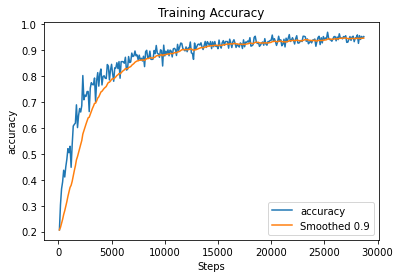

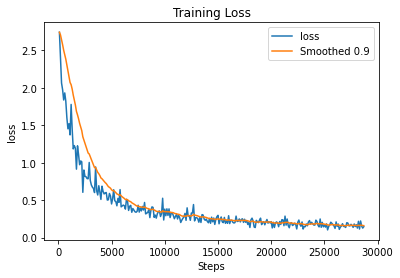

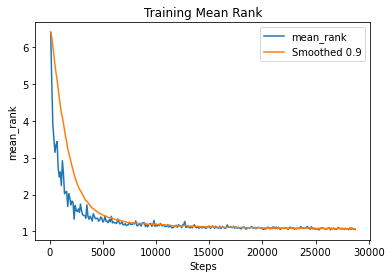

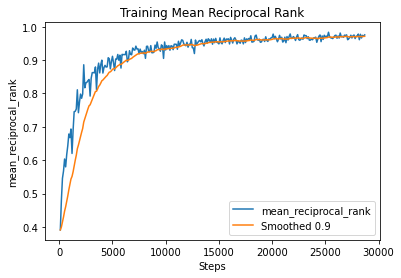

In [54]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/frcnn_pooling/training'

generate_metric_plot(frcnn_pooling_training_df, 'accuracy', 'Training Accuracy', figure_path, 0.9)
generate_metric_plot(frcnn_pooling_training_df, 'loss', 'Training Loss', figure_path, 0.9)
generate_metric_plot(frcnn_pooling_training_df, 'mean_rank', 'Training Mean Rank', figure_path, 0.9)
generate_metric_plot(frcnn_pooling_training_df, 'mean_reciprocal_rank', 'Training Mean Reciprocal Rank', figure_path, 0.9)

In [55]:
frcnn_pooling_id = "yYIy5z0DT9SlmULzQ7iQEQ"
frcnn_pooling_experiment = tb.data.experimental.ExperimentFromDev(frcnn_pooling_id)
frcnn_pooling_df = frcnn_pooling_experiment.get_scalars()

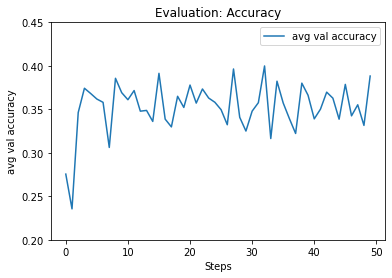

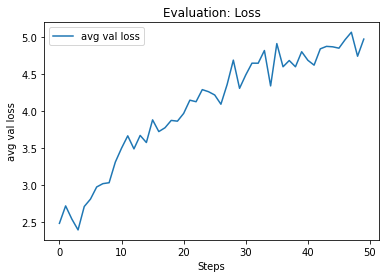

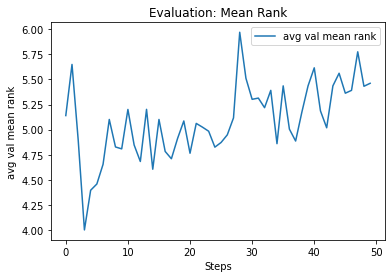

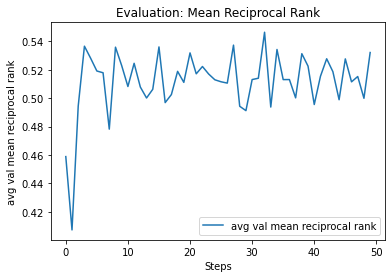

In [56]:
figure_path = '/home/yasmeen/Desktop/thesisproj/thesis/figure/results/frcnn_pooling/eval'
generate_metric_plot(frcnn_pooling_df, 'avg val accuracy', 'Evaluation: Accuracy', figure_path, 0)
generate_metric_plot(frcnn_pooling_df, 'avg val loss', 'Evaluation: Loss', figure_path,  0)
generate_metric_plot(frcnn_pooling_df, 'avg val mean rank', 'Evaluation: Mean Rank', figure_path, 0)
generate_metric_plot(frcnn_pooling_df, 'avg val mean reciprocal rank', 'Evaluation: Mean Reciprocal Rank', figure_path, 0)

In [57]:
get_maximum_row(frcnn_pooling_df, 'avg val accuracy')

,run,tag,step,value
32,.,avg val accuracy,32,0.399883
82,.,avg val loss,32,4.648781
132,.,avg val mean rank,32,5.218809
182,.,avg val mean reciprocal rank,32,0.546387


In [58]:
get_minimum_row(frcnn_pooling_df, 'avg val mean rank')

,run,tag,step,value
3,.,avg val accuracy,3,0.374253
53,.,avg val loss,3,2.391156
103,.,avg val mean rank,3,4.000649
153,.,avg val mean reciprocal rank,3,0.536564
